# 📦 Step 1: Data Preprocessing for Predictive Maintenance

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:

# Load the raw CMAPSS dataset (FD001 subset)
data_path = '../data/train_FD001.txt'

# Define column names
column_names = ['unit_number', 'time_in_cycles'] +                [f'op_setting_{i}' for i in range(1, 4)] +                [f'sensor_{i}' for i in range(1, 22)]

# Load data
df = pd.read_csv(data_path, sep='\s+', header=None)
df.columns = column_names
df.head()


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:

# Calculate Remaining Useful Life (RUL)
rul_df = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
rul_df.columns = ['unit_number', 'max_cycle']

df = df.merge(rul_df, on='unit_number')
df['RUL'] = df['max_cycle'] - df['time_in_cycles']
df.drop(columns=['max_cycle'], inplace=True)
df.head()


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


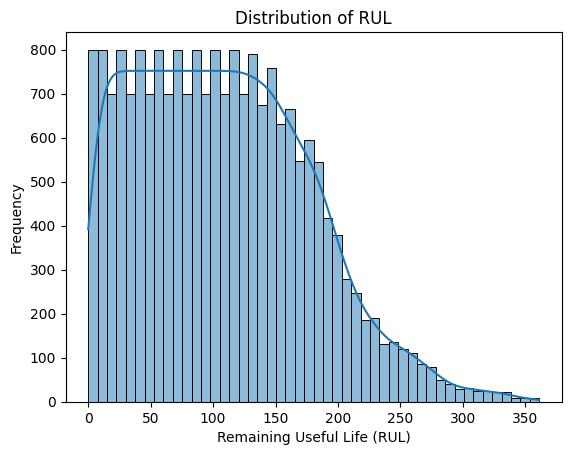

In [4]:

# Quick EDA: Distribution of RUL
sns.histplot(df['RUL'], kde=True)
plt.title('Distribution of RUL')
plt.xlabel('Remaining Useful Life (RUL)')
plt.ylabel('Frequency')
plt.show()


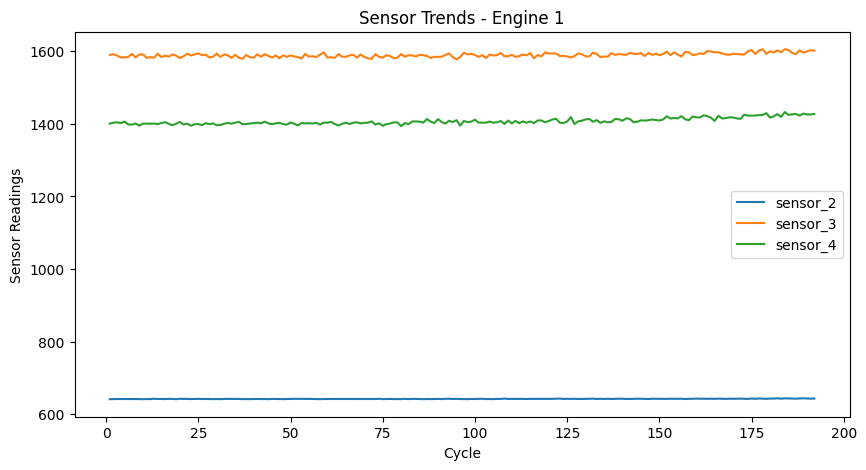

In [5]:

# Line plot for selected sensors of Engine 1
engine_1 = df[df['unit_number'] == 1]
plt.figure(figsize=(10, 5))
for sensor in ['sensor_2', 'sensor_3', 'sensor_4']:
    plt.plot(engine_1['time_in_cycles'], engine_1[sensor], label=sensor)
plt.xlabel("Cycle")
plt.ylabel("Sensor Readings")
plt.title("Sensor Trends - Engine 1")
plt.legend()
plt.show()


In [6]:

# Save preprocessed data
output_path = '../data/processed_FD001.csv'
df.to_csv(output_path, index=False)
print(f"✅ Preprocessed data saved to {output_path}")


✅ Preprocessed data saved to ../data/processed_FD001.csv
